# Airline Passenger Satisfaction Prediction Using Machine Learning

This Jupyter Notebook documents the complete analytical workflow underpinning the dissertation entitled **“Predicting Airline Passenger Satisfaction Using Machine Learning.”** 

The notebook demonstrates the end-to-end application of business analytics and machine learning techniques, covering:

- Data loading and initial inspection  
- Missing value handling and exploratory data analysis (EDA)  
- Data preprocessing and feature engineering  
- Supervised machine learning model development  
- Model evaluation and comparative performance analysis  
- Model interpretability using feature importance and SHAP explanations  

The purpose of this notebook is to ensure methodological transparency, reproducibility, and alignment between the empirical analysis presented in the dissertation and the underlying computational implementation.

## 1. Environment Setup and Libraries

This section imports the required Python libraries used for data manipulation,
visualisation, machine learning, and model interpretability.

In [2]:
#importing all libraries

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Data Loading and Initial Inspection

The Airline Passenger Satisfaction dataset is loaded and inspected to understand
its structure, dimensionality, and available features. Initial cleaning steps are
performed to remove non-informative identifiers.

In [3]:
#loading dataset 
df = pd.read_csv('/Users/gokul/Desktop/Dissertation Data/archive/train.csv')
pd.set_option("display.max_columns", None)    #to display all columns without ignoring 
print("Shape of Dataset (How many Passangers, How many Variables) : ", df.shape)
df.head()

Shape of Dataset (How many Passangers, How many Variables) :  (103904, 25)


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
df.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)

## 3. Missing Value Analysis and Treatment

The dataset is examined for missing values to assess data completeness.
Missing observations are visualised and handled using transparent imputation
strategies appropriate for large-scale quantitative analysis.

In [5]:
#checking nulls and removing it 

df.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

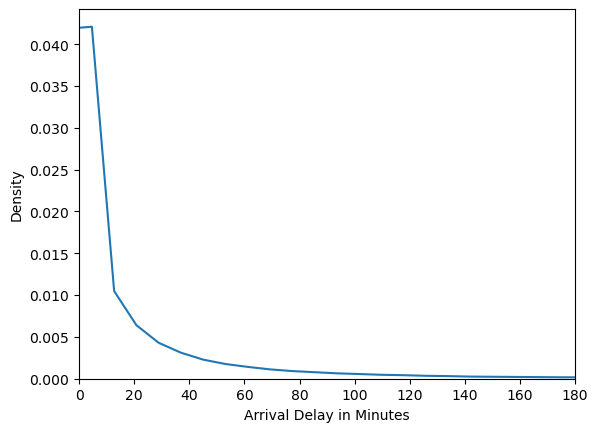

Mean of Arrival Delay in Minutes :  15.178678301832152


In [6]:
#displaying null in a smooth histogram

sns.kdeplot(data= df, x='Arrival Delay in Minutes')
plt.xlabel('Arrival Delay in Minutes')
plt.xlim([0 , 180])
plt.show()

print("Mean of Arrival Delay in Minutes : ", np.mean(df['Arrival Delay in Minutes']))

### 3.1 Handling Missing Values

Only the variable *Arrival Delay in Minutes* contains missing observations.
Mean imputation is applied due to the low proportion of missing values and the
continuous nature of the variable.

In [7]:
# Handling missing values in the 'Arrival Delay in Minutes' column
mean_delay = df['Arrival Delay in Minutes'].mean()   # calculate mean delay
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(mean_delay) #filling missing value with mean

# Confirm that no missing values remain
print("Remaining null values in 'Arrival Delay in Minutes':", df['Arrival Delay in Minutes'].isnull().sum())

Remaining null values in 'Arrival Delay in Minutes': 0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

## 4. Exploratory Data Analysis (EDA)

This section provides descriptive insights into passenger satisfaction distribution,
service quality ratings, and operational characteristics.
Detailed interpretation is provided in Appendix A.

### 4.1 Distribution of Passenger Satisfaction

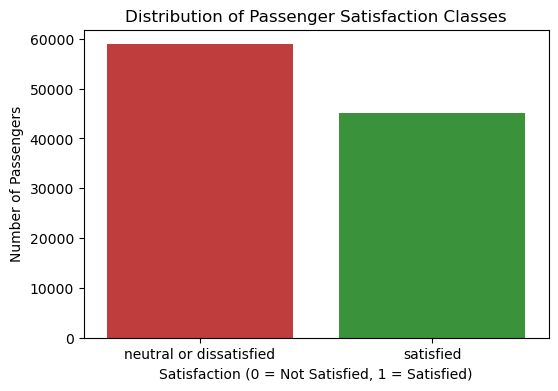

In [9]:
#satisfaction class distribution
plt.figure(figsize=(6,4))
sns.countplot(x='satisfaction', data=df, palette=['tab:red', 'tab:green'])
plt.title('Distribution of Passenger Satisfaction Classes')
plt.xlabel('Satisfaction (0 = Not Satisfied, 1 = Satisfied)')
plt.ylabel('Number of Passengers')
plt.show()

### 4.2 Distribution of Key Service Quality Ratings

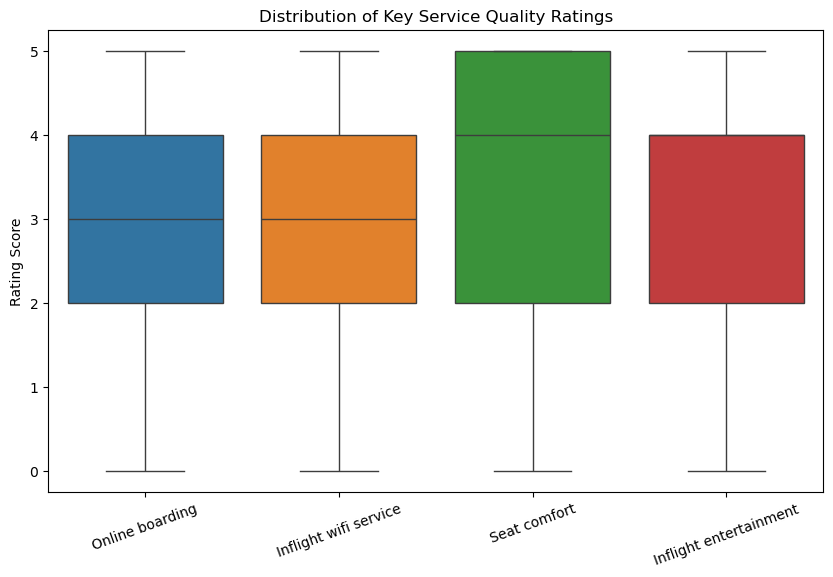

In [10]:
#Service rating quality
service_cols = [
    'Online boarding',
    'Inflight wifi service',
    'Seat comfort',
    'Inflight entertainment'
]

plt.figure(figsize=(10,6))
sns.boxplot(data=df[service_cols])
plt.title('Distribution of Key Service Quality Ratings')
plt.ylabel('Rating Score')
plt.xticks(rotation=20)
plt.show()

### 4.3 Average Service Quality Ratings Across Attributes

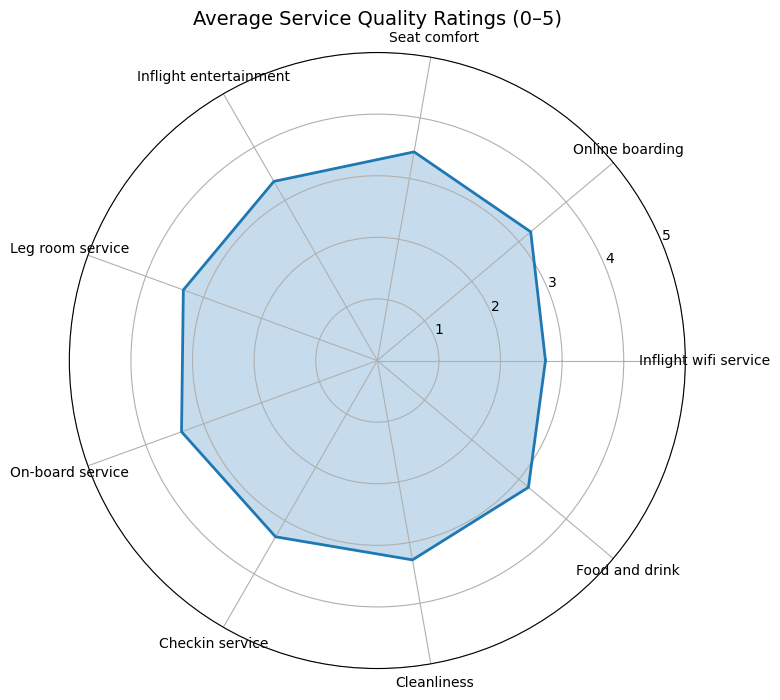

In [11]:
#Spider Plot(Service quality Rating)
# Select key service quality rating columns (0–5 scale)
service_cols = [
    'Inflight wifi service',
    'Online boarding',
    'Seat comfort',
    'Inflight entertainment',
    'Leg room service',
    'On-board service',
    'Checkin service',
    'Cleanliness',
    'Food and drink'
]

# Compute mean ratings
mean_ratings = df[service_cols].mean()

# Number of variables
num_vars = len(service_cols)

# Compute angles for radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # close the loop

# Values for plotting
values = mean_ratings.tolist()
values += values[:1]

# Create radar plot
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Plot data
ax.plot(angles, values, linewidth=2)
ax.fill(angles, values, alpha=0.25)

# Set category labels
ax.set_thetagrids(np.degrees(angles[:-1]), service_cols)

# Set radial scale
ax.set_ylim(0, 5)

# Title
plt.title("Average Service Quality Ratings (0–5)", size=14, pad=20)

plt.show()

### 4.4 Correlation Analysis of Service and Operational Features

A correlation heatmap is used to explore linear relationships among key service
quality and operational variables prior to model development.

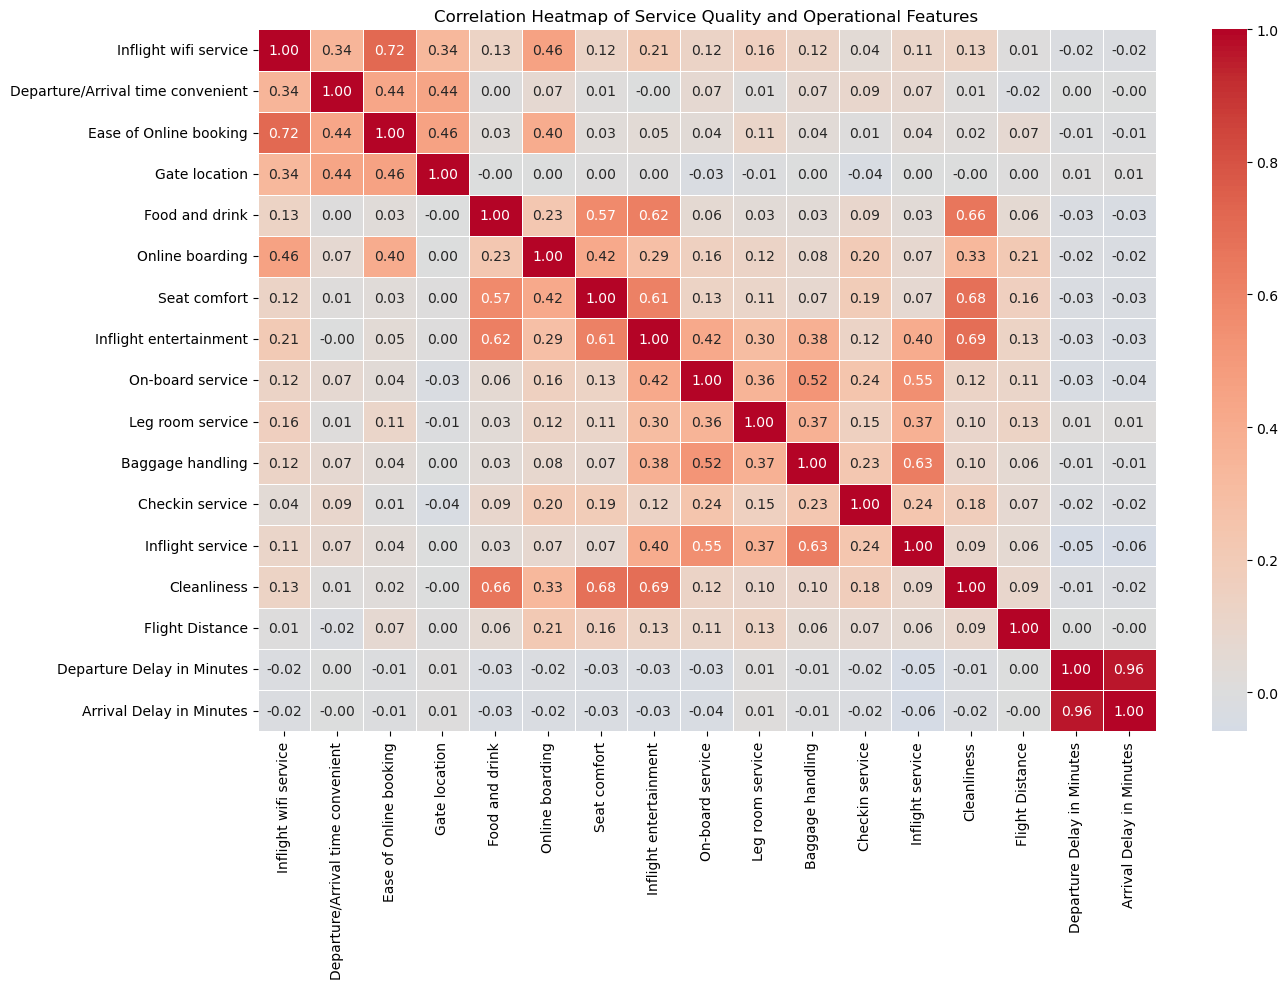

In [12]:
# Correlation features (service quality and operational features)
corr_features = [
    'Inflight wifi service',
    'Departure/Arrival time convenient',
    'Ease of Online booking',
    'Gate location',
    'Food and drink',
    'Online boarding',
    'Seat comfort',
    'Inflight entertainment',
    'On-board service',
    'Leg room service',
    'Baggage handling',
    'Checkin service',
    'Inflight service',
    'Cleanliness',
    'Flight Distance',
    'Departure Delay in Minutes',
    'Arrival Delay in Minutes'
]

#correlation matrix
corr_matrix = df[corr_features].corr()

# Plottig heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f", 
    cmap='coolwarm',
    center=0,
    linewidths=0.5,
    linecolor='white'
)

plt.title('Correlation Heatmap of Service Quality and Operational Features')
plt.tight_layout()
plt.show()

## 5. Target Variable Encoding

Passenger satisfaction is encoded as a binary target variable  
(0 = Not Satisfied, 1 = Satisfied) to support supervised classification.

In [13]:
#Encode the Target Column (satisfaction)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['satisfaction'] = label_encoder.fit_transform(df['satisfaction'])

print("Target encoding completed.")
print(df['satisfaction'].value_counts())

Target encoding completed.
satisfaction
0    58879
1    45025
Name: count, dtype: int64


## 6. Feature Identification

Categorical and numerical features are identified to guide appropriate
encoding and preprocessing strategies.

In [14]:
#to avoid accidental OneHotEncoding of target variable(satisfaction), reassigning cal_col
cat_col = df.select_dtypes(include=['object']).columns           #Categorical variables → represent customer segments
int_col = df.select_dtypes(include=['int64', 'float64']).columns  #Numerical variables → represent measurable metrics

print("Categorical columns:", list(cat_col), sep='\n')
print("Numerical columns:", list(int_col), sep='\n)')

Categorical columns:
['Gender', 'Customer Type', 'Type of Travel', 'Class']
Numerical columns:
)['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfaction']


In [15]:
# Displaying unique values in each categorical column
for i in cat_col:
    print(f"Unique values in [{i}]:")
    print(df[i].unique())
    print("-" * 50)

Unique values in [Gender]:
['Male' 'Female']
--------------------------------------------------
Unique values in [Customer Type]:
['Loyal Customer' 'disloyal Customer']
--------------------------------------------------
Unique values in [Type of Travel]:
['Personal Travel' 'Business travel']
--------------------------------------------------
Unique values in [Class]:
['Eco Plus' 'Business' 'Eco']
--------------------------------------------------


## 7. Feature Engineering and Encoding

Categorical variables are transformed using One-Hot Encoding to ensure
compatibility with machine learning algorithms while avoiding artificial
ordinal relationships.

In [16]:
# One-Hot Encoding the categorical columns
df_encoded = pd.get_dummies(df, columns=cat_col, drop_first=True)

print("Shape before encoding:", df.shape)
print("Shape after encoding:", df_encoded.shape)

df_encoded.head()

Shape before encoding: (103904, 23)
Shape after encoding: (103904, 24)


,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0,True,False,True,False,True
1,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0,True,True,False,False,False
2,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1,False,False,False,False,False
3,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0,False,False,False,False,False
4,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1,True,False,False,False,False


In [17]:
#One-Hot Encoding for Categorical Features

from sklearn.preprocessing import OneHotEncoder

# Create the encoder (drop='first' avoids dummy variable trap)
ohe = OneHotEncoder(drop='first', sparse_output=False)
encoded_array = ohe.fit_transform(df[cat_col])  #encoder learns each categories and transform each categories to binary
encoded_feature_names = ohe.get_feature_names_out(cat_col)

encoded_df = pd.DataFrame(encoded_array, columns=encoded_feature_names, index=df.index)
df = df.drop(columns=cat_col)
df = pd.concat([df, encoded_df], axis=1)

df.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0,1.0,0.0,1.0,0.0,1.0
1,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0,1.0,1.0,0.0,0.0,0.0
2,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1,0.0,0.0,0.0,0.0,0.0
3,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0,0.0,0.0,0.0,0.0,0.0
4,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1,1.0,0.0,0.0,0.0,0.0


## 8. Train–Test Split

The dataset is split into training (80%) and testing (20%) sets using
stratified sampling to preserve the satisfaction class distribution.

In [18]:
# splitting the dataset

#Define features (X) and target (y), then train–test split

from sklearn.model_selection import train_test_split

# Features = all columns except 'satisfaction'
X = df.drop(columns=['satisfaction'])

# Target = 'satisfaction' (0 = not satisfied, 1 = satisfied)
y = df['satisfaction']

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,       # keeps the same satisfaction ratio in train & test
    random_state=42   # for reproducibility
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (83123, 23)
Test set shape: (20781, 23)


## 9. Feature Scaling

Numerical features are standardised using z-score normalisation to ensure
comparability across models, particularly for distance-sensitive algorithms.

In [19]:
#scaling values to same so that ml algorithm can work better because without scaling, models get confused because large numbers dominate
from sklearn.preprocessing import StandardScaler
std = StandardScaler()                        #It transforms every numerical column so they all have mean = 0 and SD = 1 (everything comparable)
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

## 10. Model Development

Three supervised classification models are developed and evaluated:
- Logistic Regression (baseline)
- Decision Tree
- Random Forest

### 10.1 Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

# Create the model
lr = LogisticRegression()

# Train the model on the training data
lr.fit(X_train, y_train)     #learns from historical passangers (80%)

# Predict satisfaction on the test set
y_pred_lr = lr.predict(X_test)     #testing it on a test data (20%) - if a new customer flies with, us will they be satisfied?

### 10.2 Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier

#create the model
dt = DecisionTreeClassifier(max_depth = 5, random_state = 42)

#training the model
dt.fit(X_train,y_train)

#predicting on test data
y_pred_dt = dt.predict(X_test)

### 10.3 Random Forest

In [22]:

from sklearn.ensemble import RandomForestClassifier

#create the model
rf = RandomForestClassifier(n_estimators=200, random_state=42)

#train the model
rf.fit(X_train, y_train)

#Predicting on test data
y_pred_rf = rf.predict(X_test)

## 11. Model Evaluation

Models are evaluated using accuracy, precision, recall, F1-score,
confusion matrices, and ROC–AUC to ensure robust comparison.

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Evaluation metrics for Logistic Regression
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_precision = precision_score(y_test, y_pred_lr)
lr_recall = recall_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr)

print("Logistic Regression Performance:")
print("---------------------------------")
print("Accuracy :", lr_accuracy*100,'%')
print("Precision:", lr_precision*100,'%')
print("Recall   :", lr_recall*100,'%')
print("F1-Score :", lr_f1)

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Performance:
---------------------------------
Accuracy : 87.64737019392715 %
Precision: 86.90667278147214 %
Recall   : 84.17545807884508 %
F1-Score : 0.8551926439893948

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     11776
           1       0.87      0.84      0.86      9005

    accuracy                           0.88     20781
   macro avg       0.88      0.87      0.87     20781
weighted avg       0.88      0.88      0.88     20781



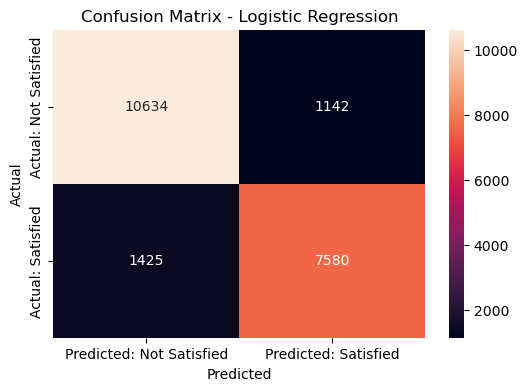

In [24]:
# Creating the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=['Predicted: Not Satisfied', 'Predicted: Satisfied'],
            yticklabels=['Actual: Not Satisfied', 'Actual: Satisfied'])

plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [25]:
#evaluating performance with y_test

dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt)
dt_recall = recall_score(y_test, y_pred_dt)
dt_f1 = f1_score(y_test, y_pred_dt)

print("Decision Tree Performance:")
print("--------------------------")
print("Accuracy :", dt_accuracy*100,'%')
print("Precision:", dt_precision*100,'%')
print("Recall   :", dt_recall*100,'%')
print("F1-Score :", dt_f1)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Performance:
--------------------------
Accuracy : 90.6934218757519 %
Precision: 90.37341555327167 %
Recall   : 87.88450860632982 %
F1-Score : 0.8911158653304808

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92     11776
           1       0.90      0.88      0.89      9005

    accuracy                           0.91     20781
   macro avg       0.91      0.90      0.90     20781
weighted avg       0.91      0.91      0.91     20781



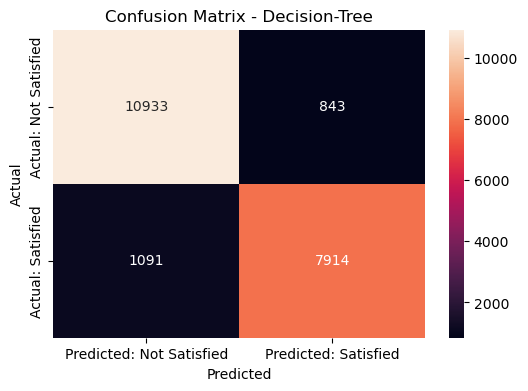

In [26]:
# Creating the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=['Predicted: Not Satisfied', 'Predicted: Satisfied'],
            yticklabels=['Actual: Not Satisfied', 'Actual: Satisfied'])

plt.title('Confusion Matrix - Decision-Tree')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [27]:
#evaluating performance in respect to y_test

rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)

print("Random Forest Performance:")
print("--------------------------")
print("Accuracy :", rf_accuracy*100, '%')
print("Precision:", rf_precision*100, '%')
print("Recall   :", rf_recall*100, '%')
print("F1-Score :", rf_f1)

print("\nClassification Report")
print(classification_report(y_test, y_pred_rf))

Random Forest Performance:
--------------------------
Accuracy : 96.25619556325489 %
Precision: 96.87749287749287 %
Recall   : 94.40310938367573 %
F1-Score : 0.9562429696287964

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     11776
           1       0.97      0.94      0.96      9005

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781



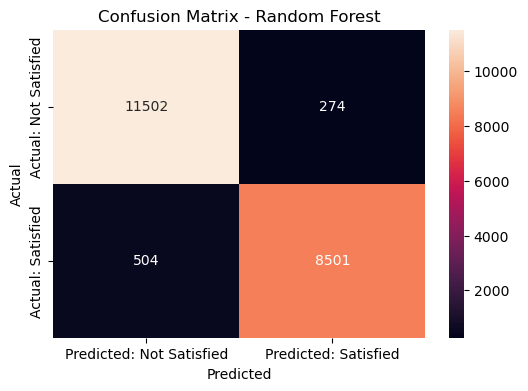

In [28]:
#Creating confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_rf)
# Plot it as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=['Predicted: Not Satisfied', 'Predicted: Satisfied'],
            yticklabels=['Actual: Not Satisfied', 'Actual: Satisfied'])

plt.title('Confusion Matrix - Random Forest')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [29]:
# ROC Curve + AUC for the Best Model(RF)
from sklearn.metrics import roc_curve, roc_auc_score

# Probability of class 1 (Satisfied)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

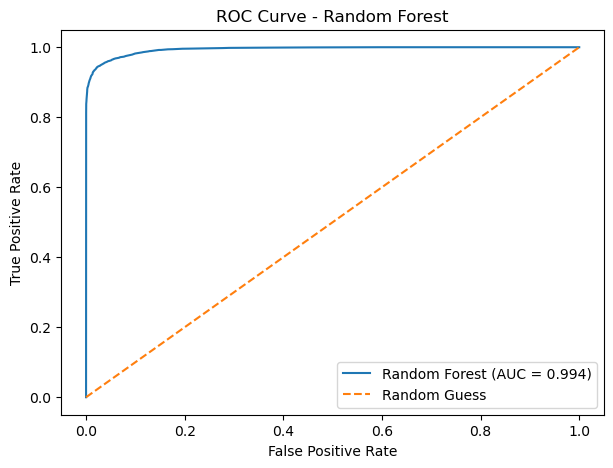

AUC Score: 0.9939598019216377


In [30]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)
auc_score = roc_auc_score(y_test, y_prob_rf)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {auc_score:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random Guess")

plt.title("ROC Curve - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

print("AUC Score:", auc_score)

## 12. Random Forest Feature Importance

Feature importance scores are extracted to identify the most influential
predictors of passenger satisfaction.

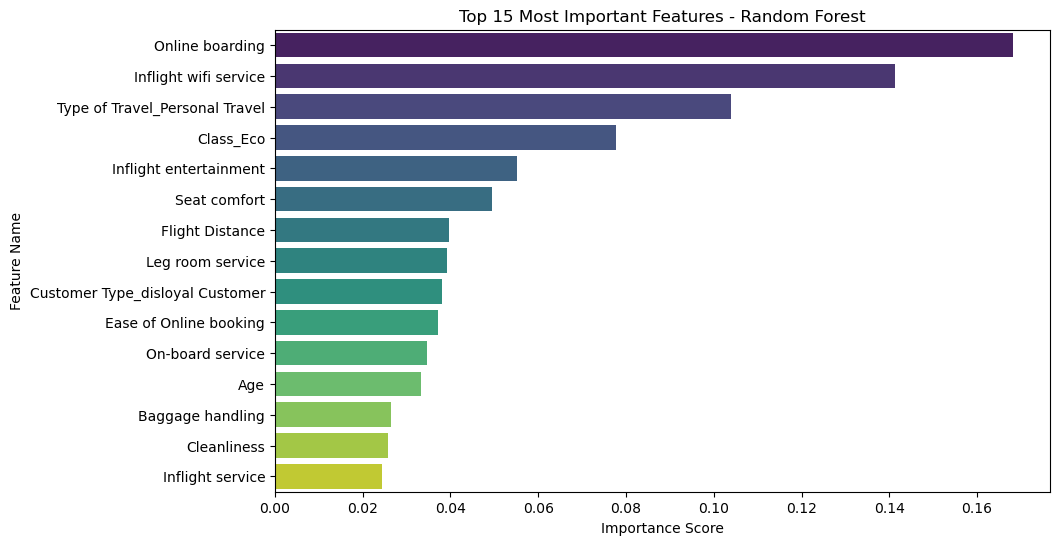

In [31]:
#feature importances 

#getting feature importance from random forest
importances = rf.feature_importances_
feat_importances = pd.Series(importances, index=X.columns)

# Plotting top 15 important features
plt.figure(figsize=(10,6))
sns.barplot(
    x=feat_importances.sort_values(ascending=False)[:15],
    y=feat_importances.sort_values(ascending=False).index[:15],
    palette="viridis"
)
plt.title("Top 15 Most Important Features - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.show()

In [32]:
# Compare model performance: Logistic Regression, Decision Tree, Random Forest

results = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [lr_accuracy, dt_accuracy, rf_accuracy],
    'Precision': [lr_precision, dt_precision, rf_precision],
    'Recall': [lr_recall, dt_recall, rf_recall],
    'F1-Score': [lr_f1, dt_f1, rf_f1]
}

results_df = pd.DataFrame(results)
results_df.style.format({
    'Accuracy': '{:.4f}',
    'Precision': '{:.4f}',
    'Recall': '{:.4f}',
    'F1-Score': '{:.4f}'
})

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.8765,0.8691,0.8418,0.8552
1,Decision Tree,0.9069,0.9037,0.8788,0.8911
2,Random Forest,0.9626,0.9688,0.9440,0.9562


## 13. Explainable Artificial Intelligence (SHAP)

SHapley Additive exPlanations (SHAP) are applied to improve interpretability
of the Random Forest model by explaining both global and local feature effects.

In [33]:
import pandas as pd

# Recreate DataFrame version of X_test with feature names
X_test_df = pd.DataFrame(X_test, columns=X.columns)


In [34]:
#Creating SHAP sample
X_shap = X_test_df.sample(200, random_state=42)

In [ ]:
import shap
import time

t0 = time.time()
print("Creating explainer...")

explainer = shap.TreeExplainer(rf)

print("Computing SHAP values...")
shap_values = explainer.shap_values(X_shap)
print("Done in", round(time.time() - t0, 2), "seconds")

# Extracting SHAP values for class - Satisfied 
shap_class1 = shap_values[:, :, 1]

In [ ]:
#Summary plot(Overall Top Drivers) -BAR Chart
shap.summary_plot(shap_class1, X_shap, plot_type="bar", show=False)
plt.tight_layout()
plt.show()

In [ ]:
#Summary Plot(Direction + impact) - Beeswarm
shap.summary_plot(shap_class1, X_shap, show=False)
plt.tight_layout()
plt.show()

## 14. Reproducibility and Alignment with Dissertation

This notebook reproduces all empirical results reported in Chapters 3 and 4 of
the dissertation. Figures and metrics are referenced in the main report and
expanded within the appendices where appropriate.